# Data Cleaning | Data Vizualization | Model Train | Titanic Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/masumauch/titanic/titanicdata.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#remove all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic= pd.read_csv('/kaggle/input/datasets/masumauch/titanic/titanicdata.csv')

## Data Anaysis 

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,170,0,3,"Ling, Mr. Lee",male,28.00,0,0,1601,56.4958,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.00,0,0,A/4 45380,8.0500,NaN,S
521,522,0,3,"Vovk, Mr. Janko",male,22.00,0,0,349252,7.8958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.00,1,5,347082,31.2750,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.00,5,2,CA 2144,46.9000,NaN,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S


In [6]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
print("Null values per column:")
# titanic.isna().sum()[titanic.isna().sum()>0]
print(titanic.isna().sum())

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survival Rates By Sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64




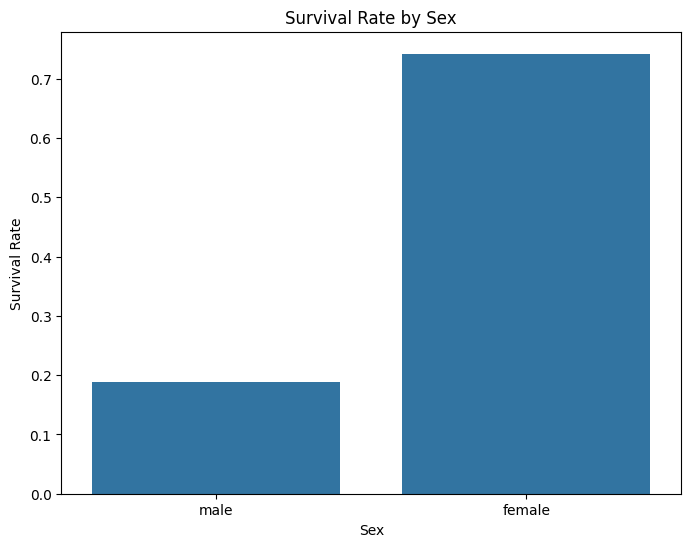

In [11]:
#Calculate survival rates by Sex

survival_by_sex= titanic.groupby('Sex')['Survived'].mean()
print('Survival Rates By Sex')
print(survival_by_sex)
print('\n')

#plot rates by sex
plt.figure(figsize= (8, 6))
sns.barplot(x= 'Sex', y= 'Survived', ci= None, data=titanic)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

## Feature Engineering & Preprocessing 

In [12]:
#filling by missing values
titanic['Age']= titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked']= titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [13]:
#Handling Name Column

titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title']= titanic['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')


In [14]:
titanic['Family'] = titanic['Parch'] + titanic['SibSp']

In [15]:
#drop columns
titanic.drop(columns= ['Ticket', 'Cabin', 'PassengerId', 'Name'], inplace= True)

In [16]:
#again drop columns
titanic.drop(columns= ['Parch', 'SibSp'], inplace= True)

In [17]:
titanic.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0
5,0,3,male,28.0,8.4583,Q,Mr,0
6,0,1,male,54.0,51.8625,S,Mr,0
7,0,3,male,2.0,21.0750,S,Master,4
8,1,3,female,27.0,11.1333,S,Mrs,2
9,1,2,female,14.0,30.0708,C,Mrs,1


## Model Train 

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
# Features & Target
X = titanic[['Pclass','Family','Sex','Age','Fare','Embarked']]
y = titanic['Survived']

In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Numeric & Categorical columns
num_features = ['Age','Fare']
cat_features = ['Sex','Embarked','Pclass', 'Family']

In [22]:
# Numeric pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [23]:
# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

In [24]:
# Combine both
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [25]:
# Final pipeline
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression())
])

In [26]:
# Train
model_pipeline.fit(X_train, y_train)

# Score
print(model_pipeline.score(X_test, y_test))

0.8044692737430168
